In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   #contains statistical measures
%matplotlib inline

In [178]:
testing=pd.read_csv(r"C:\Users\Dell\Downloads\Assignments\test_titanic_x_test.csv")
training=pd.read_csv(r"C:\Users\Dell\Downloads\Assignments\training_titanic_x_y_train.csv")

In [179]:
df_train=pd.DataFrame(training)
df_test=pd.DataFrame(testing)

In [180]:
print(df_train.shape)
print(df_test.shape)

(668, 11)
(223, 10)


In [131]:
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


<AxesSubplot:>

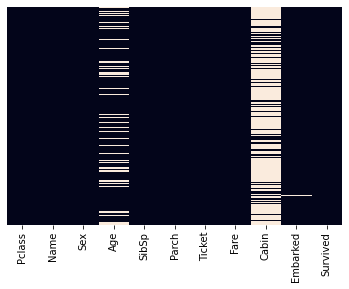

In [15]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [181]:
df_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [182]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

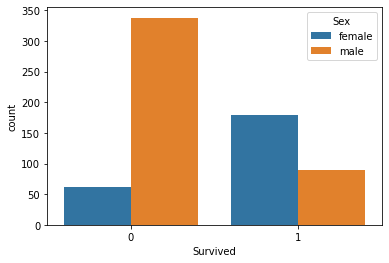

In [133]:
sns.countplot(x='Survived',hue='Sex',data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

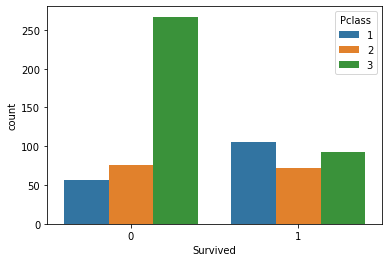

In [134]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)

In [183]:
class1_median=df_train[df_train['Pclass']==1]['Age'].median()
class2_median=df_train[df_train['Pclass']==2]['Age'].median()
class3_median=df_train[df_train['Pclass']==3]['Age'].median()

In [184]:
Class1_median=df_test[df_test['Pclass']==1]['Age'].median()
Class2_median=df_test[df_test['Pclass']==2]['Age'].median()
Class3_median=df_test[df_test['Pclass']==3]['Age'].median()

In [185]:
print(Class1_median,Class2_median,Class3_median)

44.5 31.0 22.0


In [186]:
df_train.loc[df_train['Pclass'] == 1, 'Age'] = df_train[df_train['Pclass'] == 1]['Age'].fillna(class1_median)

In [188]:
df_test.loc[df_test['Pclass'] == 1, 'Age'] = df_test[df_test['Pclass'] == 1]['Age'].fillna(Class1_median)

In [189]:
df_train.loc[df_train['Pclass'] == 2, 'Age'] = df_train[df_train['Pclass'] == 2]['Age'].fillna(class2_median)

In [190]:
df_test.loc[df_test['Pclass'] == 2, 'Age'] = df_test[df_test['Pclass'] == 2]['Age'].fillna(Class2_median)

In [191]:
df_train.loc[df_train['Pclass'] == 3, 'Age'] = df_train[df_train['Pclass'] == 3]['Age'].fillna(class3_median)

In [192]:
df_test.loc[df_test['Pclass'] == 3, 'Age'] = df_test[df_test['Pclass'] == 3]['Age'].fillna(Class3_median)

In [193]:
df_test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [194]:
df_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [195]:
df_train.drop('Cabin',axis=1,inplace=True)

In [196]:
df_test.drop('Cabin',axis=1,inplace=True)

In [197]:
df_train.drop(578,axis=0,inplace=True)

In [198]:
df_test['Embarked'][208]=1

C:\Users\Dell\AppData\Local\Temp\ipykernel_27968\2730342470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Embarked'][208]=1


In [200]:
df_test.shape

(223, 9)

In [142]:
df_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,25.0,0,0,A/5 2466,8.050,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,S,0


In [168]:
df_test.shape

(222, 9)

In [201]:
df_train.drop(['Name','Ticket'],axis=1,inplace=True)

In [202]:
df_test.drop(['Name','Ticket'],axis=1,inplace=True)

In [203]:
df_train['Sex']=df_train['Sex'].apply(lambda x:0 if x=='male' else 1)

In [204]:
df_test['Sex']=df_test['Sex'].apply(lambda x:0 if x=='male' else 1)

In [205]:
df_train['Embarked']=df_train['Embarked'].map({'S':1,'C':2,'Q':3})

In [206]:
df_test['Embarked']=df_test['Embarked'].map({'S':1,'C':2,'Q':3})

In [207]:
df_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,29.0,1,0,26.0000,1,1
1,3,0,25.0,0,0,8.0500,1,0
2,2,0,39.0,0,0,26.0000,1,0
3,3,1,29.0,0,4,21.0750,1,0
4,3,0,25.0,0,0,7.0500,1,0
...,...,...,...,...,...,...,...,...
663,2,1,17.0,0,0,10.5000,1,1
664,3,0,25.0,0,0,7.7500,3,0
665,3,0,32.0,0,0,56.4958,1,1
666,3,1,22.0,0,0,9.8375,1,0


In [208]:
x=df_train

In [209]:
x_test=df_test

In [149]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,29.0,1,0,26.000,1,1
1,3,0,25.0,0,0,8.050,1,0
2,2,0,39.0,0,0,26.000,1,0
3,3,1,29.0,0,4,21.075,1,0
4,3,0,25.0,0,0,7.050,1,0


In [224]:
x_test['Embarked'][208]='1'

C:\Users\Dell\AppData\Local\Temp\ipykernel_27968\3485064869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Embarked'][208]='1'


In [225]:
x_test['Embarked'][208]

'1'

In [210]:
y=df_train['Survived']

In [211]:
x.drop('Survived',axis=1,inplace=True)

In [212]:
print(x.shape)
print(y.shape)

(667, 7)
(667,)


In [213]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [214]:
model1.fit(x,y)

LogisticRegression()

In [215]:
model1.score(x,y)

0.7961019490254873

In [226]:
x_test_pred=model1.predict(x_test)

In [227]:
print(x_test_pred)

[0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0
 0]


In [228]:
np.savetxt('titanic_predictionss.csv',x_test_pred,fmt='%d',delimiter=',')